## 4.9 Intro to Data Visualization w/ Python

### Importing libraries + some new ones:

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\steve\Documents\CF - Instacart Project'

In [3]:
opm = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_nearfinal.pkl'))

In [4]:
opm.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,prices,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days,frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,9.0,Mid-range product,Least busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,9.0,Mid-range product,Least busy,Most orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,9.0,Mid-range product,Least busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,9.0,Mid-range product,Least busy,Most orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer


### Creating Bar Charts:

<Axes: xlabel='order_day_of_week'>

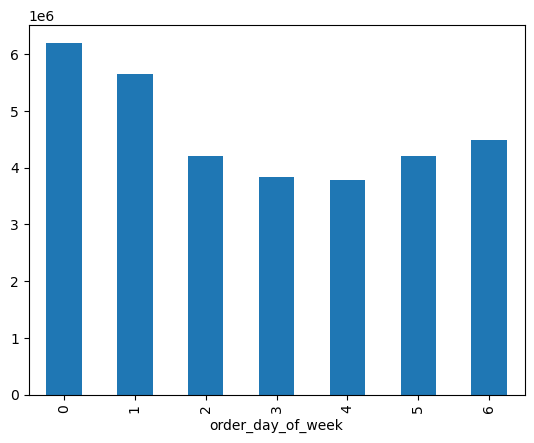

In [5]:
# Creating a bar chart for orders_day_of_week
opm['order_day_of_week'].value_counts().sort_index().plot.bar()

<Axes: xlabel='order_day_of_week'>

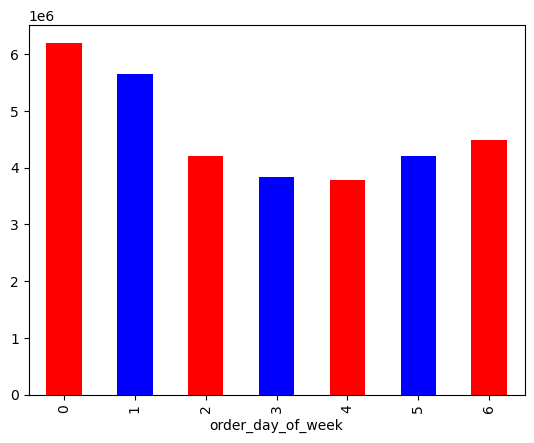

In [6]:
# Adding Color
opm['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['red', 'blue'])

<Axes: xlabel='order_day_of_week'>

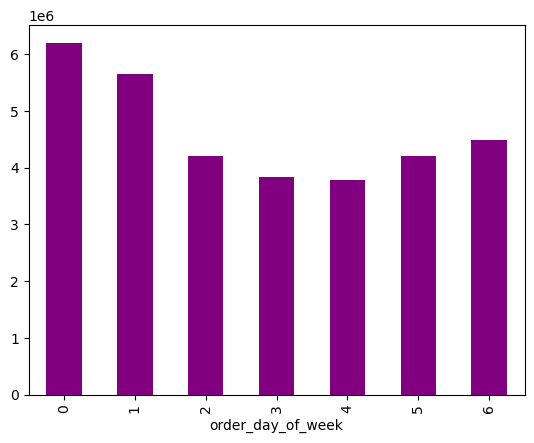

In [7]:
# For one color, it looks like this:
opm['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple'])

### Exporting Charts:

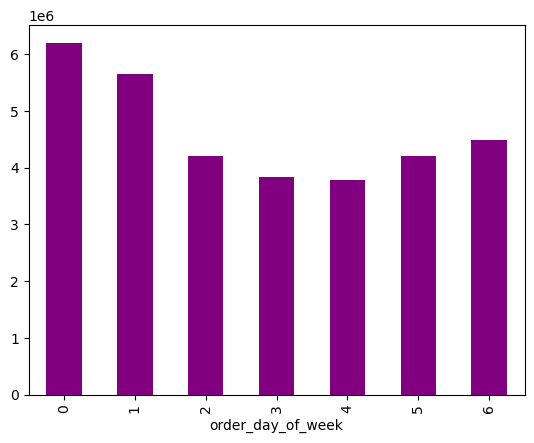

In [14]:
# To export your chart/save to Jupyter's memory
bar = opm['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple'])

In [9]:
# After the above is done, you can then save it
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

NameError: name 'bar' is not defined

In [22]:
bar_ordweek.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

In [11]:
custom_labels = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']

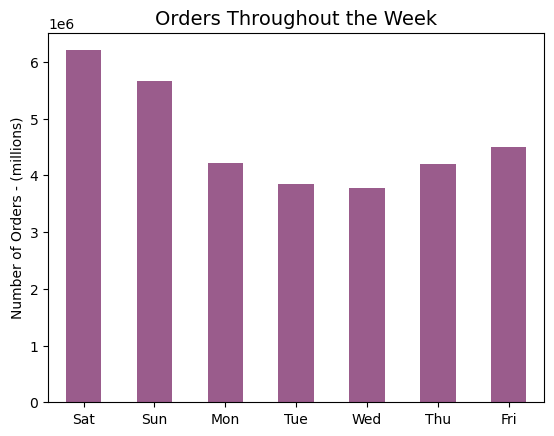

In [21]:
# Coming back end of project to improve this bar chart
bar_ordweek = opm['order_day_of_week'].value_counts().sort_index().plot.bar(color='#9a5c8c')
plt.xticks(range(7), custom_labels, rotation=0)
plt.xlabel("", fontsize=10)
plt.xticks(rotation=0)
plt.ylabel("Number of Orders - (millions)", fontsize=10)  
plt.title("Orders Throughout the Week", fontsize=14)
plt.show()

### Creating Histograms and Scatterplots:

<Axes: ylabel='Frequency'>

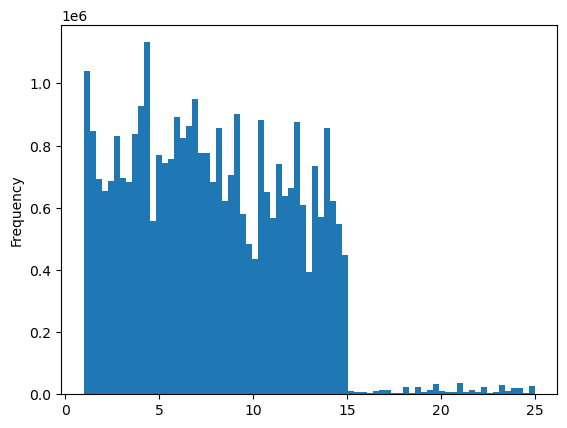

In [30]:
# Creates a histogram, it looks normal unlike the example because I resolved the $99999 item
opm['prices'].plot.hist(bins=75)

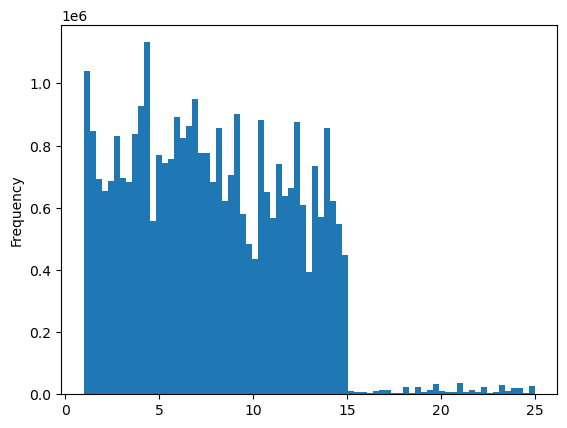

In [31]:
histo=opm['prices'].plot.hist(bins=75)

In [32]:
histo.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'histogram_prices.png'))

<Axes: xlabel='prices', ylabel='prices'>

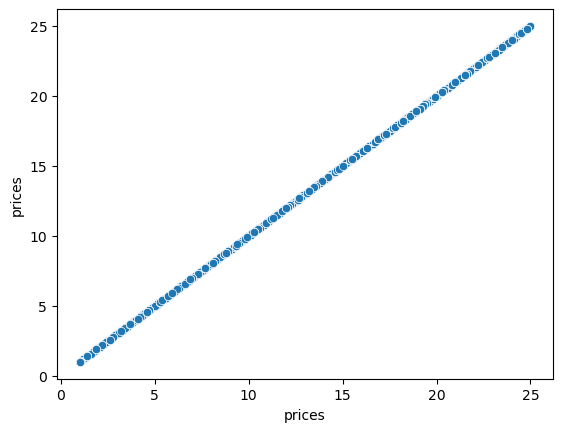

In [13]:
sns.scatterplot(x = 'prices', y = 'prices',data = opm)

In [21]:
# To turn defined values to null
opm.loc[opm['prices']>100, 'prices']=np.nan

In [22]:
opm.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,prices,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days,frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,9.0,Mid-range product,Least busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,9.0,Mid-range product,Least busy,Most orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,9.0,Mid-range product,Least busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,9.0,Mid-range product,Least busy,Most orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer


### Creating Line Charts:

In [6]:
# Use Numpy's random tool to assign random values throughout the dataset and split it
np.random.seed(4)
dev = np.random.rand(len(opm)) <= 0.7

In [7]:
# Verifying we are getting Boolean results
dev

array([False,  True, False, ...,  True,  True,  True])

In [12]:
# Store 70% of the sample to the big dataframe
big = opm[dev]

In [13]:
# Store 30% of the sample to the small dataframe
small = opm[~dev]

In [15]:
# to check the number of rows
len(opm)

32404859

In [16]:
len(big)

22683761

In [17]:
len(small)

9721098

In [19]:
len(big)+len(small)

32404859

In [20]:
# Hey, 30%, that worked out very well
len(small)/len(opm)

0.2999888998128336

In [21]:
# consolidating the chart to only have necessary columns
df_2 = small[['order_day_of_week', 'prices']]

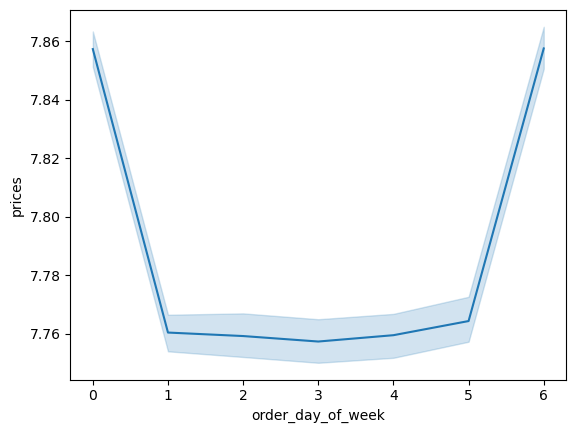

In [27]:
line = sns.lineplot(data = df_2, x = 'order_day_of_week', y = 'prices')

In [29]:
line.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'line_prices.png'))

### Practicing Crosstabs:

In [6]:
var = pd.crosstab(opm['days_since_last_order'], opm['order_number'], dropna=False)

In [7]:
var.to_clipboard()

In [9]:
opm.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_days', 'frequency_flag'],
      dtype='object')